In [1]:
import pandas as pd
from io import StringIO
from win_loss_report import win_loss_report

# Don't Be a Sucker, Part 7: Touts
by Casey Durfee    
Copyright 2025.

I've been saying that a good bettor could wing 56% of the time on NBA betting. But I haven't made any effort to prove that. You've seen that the lines aren't perfect. Almost half the time the betting public pushes the line in the wrong direction. So the lines are theoretically beatable. At the same time, people can't see the future, so there has to be a practical limit.

What if we were trying to figure out how high humans can jump? It might be possible to work out the maximum force human muscles can create and so on. But I would probably just find some of the best jumpers in the world and see what they can do. They're probably pretty close to the actual limit, whatever that is.

There's no end to people hawking picks. Amateurs on social media. Betting sites offering their "best bets" of the day. Come on, they're not running a charity. If the sportsbook somehow knew what bets were more likely to win, which way would they want you betting? 

If you want a job done right, you call a professional. How do the touts, people who sell picks for money, do?


### Vegas Insider

![vi](img/vegasinsider.png)

Vegas Insider is a site that sells picks from a large number of handicappers. Kudos to them for making records available, but their picks don't appear to be much better than guessing.

These are the 2024 NBA records of all handicappers on the site.

In [2]:
from io import StringIO


VEGAS_INSIDER_DATA = """
Handicapper,Year,Wins,Losses,Avg Odds,Profit,net units,win percentage
Bill Marzano,2024,161,168,-111,-2861,-23.8,48.94%
Brian Edwards,2024,138,143,-110,-1891,-19.3,49.11%
Bruce Marshall,2024,287,249,-110,1244,13.1,53.54%
Chip Chirimbes,2024,173,145,-111,1208,13.5,54.40%
Daniel Dobish,2024,110,116,-108,-1596,-17.6,48.67%
Jonny Reno Jorcin,2024,46,35,-110,746,7.5,56.79%
Jorge Gonzalez,2024,129,150,107,-3195,-36,46.24%
Mark Franco,2024,81,89,-110,-1662,-16.9,47.65%
Micah Roberts,2024,187,188,-112,-2274,-19.8,49.87%
Nick Parsons,2024,84,87,-111,-1306,-11.7,49.12%
Paul Bovi,2024,76,70,-114,-360,-1,52.05%
Ray Monohan,2024,133,122,-111,-187,-1.2,52.16%
Stephen Nover,2024,154,136,-112,223,4.4,53.10%
Vince Akins,2024,189,153,-110,2056,20.7,55.26%
Zack Cimini,2024,43,49,-110,-1093,-10.9,46.74%
"""

vi_df = pd.read_csv(StringIO(VEGAS_INSIDER_DATA))

vi_df.sort_values('net units', ascending=False)

,Handicapper,Year,Wins,Losses,Avg Odds,Profit,net units,win percentage
13,Vince Akins,2024,189,153,-110,2056,20.7,55.26%
3,Chip Chirimbes,2024,173,145,-111,1208,13.5,54.40%
2,Bruce Marshall,2024,287,249,-110,1244,13.1,53.54%
5,Jonny Reno Jorcin,2024,46,35,-110,746,7.5,56.79%
12,Stephen Nover,2024,154,136,-112,223,4.4,53.10%
10,Paul Bovi,2024,76,70,-114,-360,-1.0,52.05%
11,Ray Monohan,2024,133,122,-111,-187,-1.2,52.16%
14,Zack Cimini,2024,43,49,-110,-1093,-10.9,46.74%
9,Nick Parsons,2024,84,87,-111,-1306,-11.7,49.12%
7,Mark Franco,2024,81,89,-110,-1662,-16.9,47.65%


In [3]:
print(vi_df['Wins'].sum())
print(vi_df['Losses'].sum())

print(vi_df['net units'].sum())
print(vi_df['Profit'].sum())

print(vi_df['Wins'].sum()/(vi_df['Wins'].sum() + vi_df['Losses'].sum()))


1991
1900
-99.0
-10948
0.5116936520174762


if you took every single NBA bet offered on the site in 2024, you'd be down 99 units. In reality you wouldn't do that because you'd probably end up taking both sides of the same bet on occasion due to handicappers disagreeing.

But even if you just picked one guy to follow, only 5 out of 14 handicappers actually made money. Only one hit a winning percentage over 55% on high volume.

Also note the average odds taken. Except for two, they are all taking bets with an average vig greater than or equal to -110, which makes the records even worse. Based on looking at the free picks on the site, it may be due to taking the money line (eg -125) in close games instead of a small spread (-1.5 -110). I doubt that is better from an expected value standpoint, but it will make the handicapper's record look a little better while still taking roughly even bets.

The average winning percentage on Vegas Insider is too low to make money, even at -105 reduced juice.

### Sportscapping

Another pick site seems to have slightly better cappers, though they charge a lot more for their picks: https://www.sportscapping.com/top-nba-all-trends.html

The top individual on that site has gone 2,828-2,390 with an average odds of -108. That's legit:

In [4]:
win_loss_report(2828, 2390, vig=1.08)

record:   2828 - 2390
actual (1.08 vig) units: 246.8
full vig (-110) units: 199.0
reduced juice (-106) : 294.6
reduced juice (-105) : 318.5
betting market       : 312.53
win pct: 54.2%, expected wins: 2609.0
excess: 219.0, profit %: 4.73
z test: 6.06, std: 36.12 , p-value: 0.0


Give the man his flowers. This is the first solid proof I've found that people can actually beat Vegas over a long period of time.

The winning percentage is very low, but that's partially due to taking bets at an average of -108. Notice how going from -110 to -108 on the vig leads to 48 more units of profit. And going from -108 to -105 yields another 71 wins.

See why I've been hammering this vig stuff?

TODO: clean up following prose, consistent voice

247 units over 16 years of handicapping is +15 units a year, which isn't a lot.

He charges $35 a pick. Let's say we bought every single one of them. That would cost us $182,630. That's $739 per unit won. So we'd need to risk (1.1 * 739) = $813 on every one of his 5,218 picks just to cover the *cost of the picks themselves*. Anything less than that and we would be losing money.

The cost of the picks is basically another vig you have to overcome to make profits. If we're betting $100, then the pick cost is $35 and the vig is $10. So it's basically like taking every bet at -145. you're guaranteed to lose money if you do that. If we're betting $1000, then the pick cost is still $35 but the vig is $100. So it's like taking the bet at -113.5 instead of -110. Which is awfully hard to beat at a 54.1% winning percentage.


There's also a huge labor cost to placing 5,200 bets over a 16 year period. Imagine having to make bets every day of the NBA season for 16 years.

### Backtesting, counterfactuals and survivorship bias

There's an obvious problem with taking someone's 15 year record and calculating possible profits off it.

Nobody knew this guy was going to go 2828-2390 over the next 15 years back when he started in 2009. "We could have made __ if we had done __" is a counterfactual. If you could send a note back in time to yourself in 2009, it would probably say "buy bitcoin" or something, not "buy the picks of this guy who will win 54% of his bets over the next 15 years".

The Sportscapping site doesn't seem to have any handicappers with a win percentage below 52.4%. Do you think that's because they've never had a handicapper with a long term losing record? 

It seems more likely to me that Vegas Insider is just more honest about it. This is classic survivorship bias: https://en.wikipedia.org/wiki/Survivorship_bias

What if we picked the wrong handicapper in 2009? There were a lot of other guys on that site back then:

https://web.archive.org/web/20090306055251/http://sportscapping.com/handicappers.html

How would you have known that this was "the" guy to follow? 

The final problem here is that we'd need to know the win rate in order to do Kelly betting. If we thought the picks would win at a 56% rate instead of a 54% rate, we could be in trouble.

## Philosophical Interlude: Bros Need Cool Stories

People selling picks always write a little story to go with them justifying their pick. They give a paragraph saying "Dallas hasn't been playing well on Tuesday nights when it's a full moon" or whatever. Seems like that's what dudes are really paying for.

I love these stories as a micro-genre of speculative fiction. Not because they're well written, but because they have to find something to say to go with hundreds of picks. A lot of it is stuff like "Pacers are 9-3 ATS in their last 12 games following a ATS loss." 

It's really a combination of bad sportswriting, bad statistics, and astrology. People don't go to psychics because psychics can see the future. They go for a coherent story about the future. "Truth is a luxury; fiction a necessity." Statistics provide a quasi-rational, bro-ey flavor that is lacking in horoscopes. No "Jupiter has gone 9-3 ATS in its last 12 months when it's in retrograde".

Handicappers these days tend towards a bit more realistic-sounding analysis rather than obvious statistical fallacies. Stuff like "I think they'll be tired after a long road trip." Or "the vibes have seemed wrong with this team." Or "this team is bad on defense when ___ doesn't play". 

It leads to a slightly better literary product. As an NBA fan, the analysis isn't all that deep, but I can read some of them and go, "that's reasonable". Most NBA analysis isn't all that deep in general, and they all promote and talk about gambling now, so it's kinda just like a mediocre NBA podcast. 

But if these cool bro stories don't seem to lead to the picks winning more, so what's the point? The only thing a customer should care about is the winning percentage of the handicapper, not their literary talents.

I say "dudes" deliberately. The whole thing is very dude-centric. Over 70% of sports gamblers are men: https://www.statista.com/statistics/1105283/sport-gambling-interest-gender/ . Almost all the handicappers and podcasters that push gambling are men. The language they use to sell the picks is very, shall we say, male coded.

Some recent examples:

> "Experience the thrill of winning with confidence with the help of razor-sharp predictions. We're your secret weapon for [CRUSHING THE ODDS!](https://www.sportscapping.com/sal-michaels.html)"

> "Sean Higgs has been [crushing 'The Man'](https://experts.winnersandwhiners.com/cappers/37) since the early 90s..."

Some colorful ones from 2009.

> "[CRUSH YOUR MAN on the weekends](https://web.archive.org/web/20090216002309/http://sportscapping.com/handicappers.html?capper/279/Black%20Widow) with The Widow's 3-Day Weekend Warrior Package! "

> "Beat your man all week long with every single play released from The Widow for 7 days!"

> "It's time for a new NBA season and Rob is ready to [dominate the odds makers](https://web.archive.org/web/20081224010345/http://sportscapping.com/handicappers.html?capper/294/Rob%20Vinciletti) all season long." [10]

> "[Take your book to the slaughterhouse](https://web.archive.org/web/20091231234929/http://sportscapping.com/handicappers.html?capper/271/Jeff%20Alexander) on New Year's Day with World Champion Handicapper Jeff Alexander as he continues his Rock Solid 34-19 NCAAF Sides Run (64%) with his Ohio State/Oregon 5* Wiseguy Rose Bowl MONSTER (ABC), his LSU/Penn State 4* Major Capital One Bowl BOMB (ABC), and his Cincinnati/Florida 4* Major Sugar Bowl BOMB (FOX)! " [11]


I have a lot of books, dude. Which one should I take with you to the slaughterhouse? Is Upton Sinclair's _The Jungle_ too obvious? Why are we going to the slaughterhouse on New Year's Day, anyway?

### Timberwolves you used to know
Time for me to get on my middle aged man soapbox for a minute about you kids these days.  Betting is now a Thing For Guys To Talk About. Guys used to make things. Now they make bets. Instead of lore about nature and the world, men now trade gambling lore. Instead of stories about the migrations of birds, the names of the ancestors, and the creation of the Universe, it's stories about how Jimmy G will always ruin your parlay.

There's so much vocabulary and quasi-technical stuff to learn. How a teaser works. What a "stay away" team is. The "banlist". "Laying the points". Who's on a "hot streak". What "Vegas is trying to tell us". Who you shouldn't bet on in cold weather. Taking scalps. "Chasing steam". Great, now I have something I can say in both a sportsbook and a [Phish](https://phish.in/2013-12-28/steam) parking lot!

Perhaps it feels like secret knowledge, like absorbing all this lore is how you get skilled at betting. But hopefully by now you understand it's not actually a skill for most guys. What are they learning from all this lore?

It might be called an anti-skill. What's another situation where the more information you have, the more lingo you know, the worse you are at it? 

Every "advanced" betting technique I've seen makes it harder to win, even for people with skill at sports betting. Parlays, prop bets, same game parlays, teasers -- they all introduce hidden taxes on the bettor. 

If a bettor wins half the time, the vig is the reason why they go broke. The vig is kind of the cost of placing the bet. Paying more vig should somehow give the experienced bettor an advantage in another way. these bets don't do that. They make it harder to make money.


### Explanatory Fictions and Imaginary Relationships
A parasocial relationship with a guy selling picks or talking about gambling on a podcast causes guys to want to form social relationships around gambling. They're Gambling Guys now. Which leads to an endless parade of dudes complaining about their parlays online, and, I would wager, annoying the heck out of their significant others. "It's a whole lifestyle, Sherri! Of course I had to get my tips frosted! I'm a Gambling Guy now!"

It's all imaginary. An imaginary relationship with a betting guru in the form of a "hot tip". An imaginary relationship with the sporting event or player in the form of a bet. An imaginary relationship with reality itself in the form of the rationalization about why the "hot tip" didn't win. An imaginary relationship between winning and skill. 

Being a sports fan is already ridiculous enough.

Dudes do the storytelling in reverse when a bet loses. A whole paragraph about "I thought that Durant was gonna blah blah blah but instead blah blah". This is silly. A rational bettor wouldn't try to learn too much from any one data point, much less post a whole essay about it to the internet. This is known as overfitting. It's bad!

### Robot, Teach Thyself
I couldn't stand reading too many explanations of losses, but the thinking seems to be that if you just, like, learn a rule from every bet you take, eventually you will have this system of rules that will never steer you wrong.

I got interested in AI in the late 90's. Learning by creating a bunch of rules is fascinating to me because that's kind of how AI started out, and that's definitely not where it is now. Early AI researchers created what are called [Expert Systems](https://en.wikipedia.org/wiki/Expert_system). 

Some mushrooms are poisonous, and some are not. There are books that will help you classify mushrooms you find. If it's brown and smaller than this size and has this type of cap and that type of spore print, it's edible.  You can put all these rules into a big tree. If brown, take the left branch, if not brown, take the right. Eventually, after a series of decisions, you get to a leaf which says either "eat it" or "don't eat it". This is called a [decision tree](https://en.wikipedia.org/wiki/Decision_tree).

Dude Betting Stories are similar. "Never throw the Chargers in a money line parlay, unless they're going against a team with an interim coach when it's raining." It's a reasonable way for trying to model the thinking of an expert, something a non-expert could use to borrow their talents on Sunday afternoons. 

[TODO improve this]

But it's a limited technique in practice, especially when it's being self-applied. 

It's weird to see the folk psychology version of this old AI thing that doesn't work well. Decision trees tend to overfit, and make really arbitrary decisions. Where a human expert might make a qualitative decision like "big" or "small", a decision tree needs an exact threshold.

There are better techniques for classification now. But they can't really tell you a story the way a decision tree can. "Explainable AI" is a big thing now because deep learning is like an oracle that Just Knows Stuff, and it can't really tell you why.

### Learning the Right Amount
In case I haven't said it enough times, nobody cares about your terrible bets, especially when you took the more obvious side. No, LeFraud didn't betray you by failing to cover by one point. More likely the line was one point too generous on the side of the underdog because most people bet the Lakers.

Based on all I've seen, someone who can actually do this is still only winning 55ish percent of the time. Which means that 45% of the time they're going to lose even if they pick the side of the bet that was more likely to win. Maybe it's a really strong bet and for some reason they know it has a 66% chance of winning. Should they be surprised if it loses? No. That's a totally normal thing to happen one time in three.

Imagine I had a magic black box that was right about NBA lines 56% of the time. I could sell those picks, and be one of the better handicappers on the internet. While I could certainly write a little story for each one, maybe in the style of Raymond Carver -- "Will You Please Take The Over, Please?" -- the story doesn't make the bet more likely to be true, though, right? A factual story would be the same for every bet, and not very interesting: "there is slightly more value on this side of the bet, according to the model." 

Bros need stories, though.

### Timing is everything
To be fair to the touts, it seems like they have to get their out well before the start of the game. This could be before information about injuries is available, which makes taking picks harder. But the closing lines should be harder to beat than the opening lines. So they may get a small advantage back by taking bets before the market has moved the opening line very far.

Lines move, so to get the exact same bet as the pick seller, you would need to place your picks at the same time they do.  Say they recommend betting on Denver when the line is DEN -3.5. A bunch of people take the bet, so the sportsbook moves the line to DEN -4.5. Denver wins by 4 points. It was a win for the tout and a loss for people who took his recommendation but bet the closing line.

It could cut the other way as well. The pick seller recommends Orlando +7. A bunch of bets come in on the other side, it closes at ORL +9. The team loses by 8, so it's a loss for the tout but a win for people who bought the pick.

If you believe in the efficiency of the market, the price for the winning side should get more expensive from the opening line to the closing line. Which means that if you don't take the pick seller's picks right away, you could get a worse number. But as we've seen, the market is only semi-efficient.

## Can an amateur do it?

### The Odd Case of Oddspedia
I found a site called oddspedia, where people can make fake bets: https://oddspedia.com/

There are people on that site have made thousands of fake bets. Nearly everyone is terrible at it, yet they persist. There are small prizes for being the best bettor one month, but otherwise I don't really understand the incentives. But if there are people who can consistently beat the lines, oddspedia seemed the best place to find them.

And hey, there are people on the site who can really do it. This is the current top user:

https://oddspedia.com/u/s00n/stats

6535-4984 all time, which is a staggering volume. And they're not taking safe bets - the average odds taken is 2.25, which is +125 in freedom units. They're taking longer odds and winning. With 10K picks, if it's legit, I would hope it's an algorithmic strategy.

The actual bets taken are fascinating. Most of them are on soccer. I don't know where the lines are coming from, because a lot of them are incredibly obscure. 

The Ugandan Police soccer team (seems like a weird team to bet against, but OK). Something called an "Asian Handicap" bet on Clube de Albergaria, a Portuguese women's soccer team with 10,000 likes on Facebook. A bet on Ermis Shimatariou, a Greek 2nd division basketball team that plays in what looks like a small high school gym. A bet on a team called "MC Oran", who I guarantee you has a SoundCloud.

I'm skeptical anyone could really take these bets in the real world. I couldn't find them being offered anywhere.

I was curious enough to make an account and it looks like the lines they use are substantially different from the sportsbooks, especially on non-standard bets like the 1st quarter score. The vig is also unrealistically low, like [-105/+103]. It's a lot easier to look smart when you're paying a vig like -101 instead of -110.

So there might be something to oddspedia, but it's not realistic. It's notable with all these advantages to the player that most of the users of the site still lose, massively, over the long term. Better that than real money. But it makes me rethink my stance that there's no potential downside to making fake bets. At some point don't you realize this isn't your thing?

### Pyckio

[Pyckio](https://pyckio.com/i/#!rankings/basketball-usa-nba) is a sort of "wisdom of crowds" tout service. Anyone can set up an account and post their picks there. Over time, if their bets win, they get a higher status on the site. At the highest status of "PRO", their picks are aggregated with other high-ranked tipsters as a subscription product that costs $1,200 per six months.

With any site with this many people making picks, some people are going to look more skilled than others due to large sample size. There will be a few outliers who look good solely due to chance. In an excellent article titled ["The Illusion of Skill"](https://cognitivefootball.wordpress.com/2018/03/04/the-illusion-of-skill/), the website "Cognitive Football" looked at the pyckio touts in 2018 and found that people who achieved PRO status did not maintain their high win rates. There was basically no correlation between the win rate of the tipsters before they got PRO status and after. Most of them regressed back to lower win rates.

Pyckio doesn't have a lot of people picking NBA games, so there's not a lot to compare to. [Here's the best picker on the site for NBA](https://pyckio.com/i/#!account/eppleysports/basketball-usa-nba), and the only one with PRO status. That person is up 58 units on 1,291 NBA basketball games. Although the bets are at variable odds, that's equivalent to going 704-587 on straight-up bets:

In [5]:
win_loss_report(704,587)

record:   704 - 587
full vig (-110) units: 58.3
reduced juice (-106) : 81.78
reduced juice (-105) : 87.65
betting market       : 85.9
win pct: 54.53%, expected wins: 645.5
excess: 58.5, profit %: 4.52
z test: 3.26, std: 17.97 , p-value: 0.0006


However, they've only earned 7.1 units over the past 3 years. I think the record's good enough to say this person really can do it a little, but their picks wouldn't be all that useful.

[Here's the second best NBA tout on the site](https://pyckio.com/i/#!account/nbadictobet/basketball-usa-nba). They have a good long-term record but are down around 25 units this season, and earned most of their success in a small window of time.

![note bet sizing](img/betsizing.png)

As "The Illusion of Skill" points out, with enough people making picks, some of them will rise to the top based solely on chance.

There are 77 NBA touts listed on pyckio. 35 of them have a winning record against the spread, though many of those are with less than 200 picks total.  There is undoubtedly some selection bias -- people who don't get positive results stop doing it, so the ones that continue doing it are not a random sample.

There may not be enough demand for NBA picks on there to attract people who are really good at it.

## Silly things touts do

Touts advertise on the basis of their recent results. They're on a heater, going going 8-2 over their last 10 picks. Or they're 123-112 on the season. Or worst case scenario, they went 1-0 in their last 1 picks.

Hopefully I've shown you enough random walks that you should believe a small sample size isn't useful at assessing performance. Just flipping a coin will lead to winning and losing streaks as well. If it's a biased coin, like a skilled bettor is, it will produce more winning streaks than losing streaks. But streaks in both directions will happen. The best estimate is using all the data available.

"People aren't coins", you might say. Which is true. A coin doesn't have any memory. People have good days and bad days. It's entirely believable that a tout might be in an especially good mood, or especially "locked in" to what is happening on every team, or the games are easier to predict in a particular period of the season, so their win rate is higher than usual. 

I find tha believable, but would we tell that just by looking at their recent results?

Let's say the tout has good skill weeks and bad skill weeks, or some other period of time. Some periods, their picks are no better than a coin flip, other periods their picks are excellent at 57.4%.

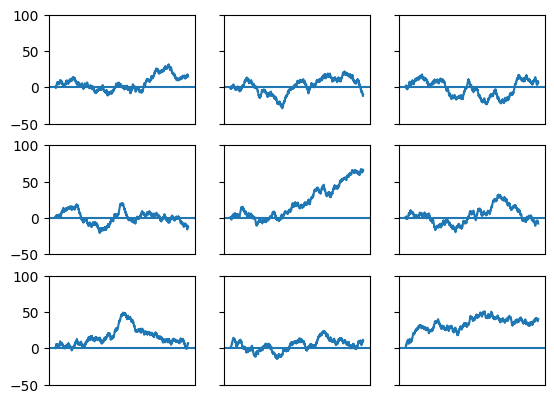

<Figure size 800x800 with 0 Axes>

In [6]:
from random_walk import RandomWalk

rw = RandomWalk()

data = []
skill_levels = [.50, .574]
for x in range(9):
    walk = rw.generate_alternating(skill_levels, determinate=True)
    data.append(walk)

rw.plot_random_walk2(data)

Can you tell that the skill level is alternating every 100 bets between good and bad?

Let's draw lines every time the skill level changes. A red line means the lower skill level is now in effect, and green means the higher skill level.

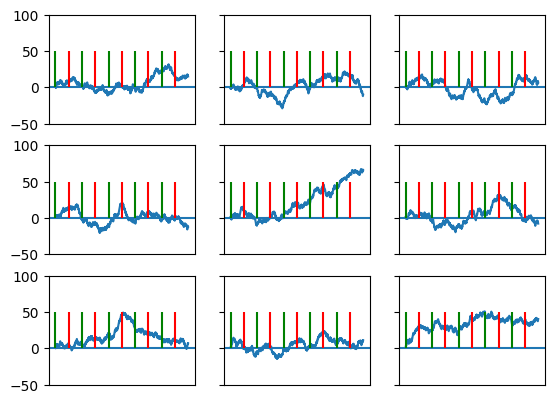

<Figure size 800x800 with 0 Axes>

In [7]:
rw.plot_random_walk2(data, True)

Once you see the lines, maybe you notice the patterns, but did you notice them before?

here are random walks at the equivalent probability:

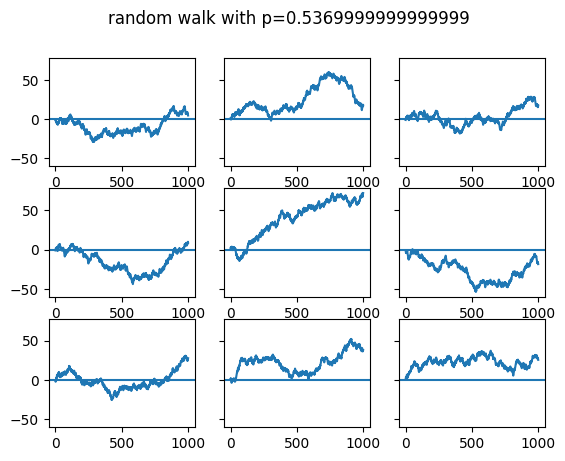

In [9]:
## TODO: put all this code in its own file instead of having this stuff inline.
import numpy as np
rw.plot_random_walk(np.mean([.5, .574]))



Maybe there are small details that a random walk enthusiast could notice, but the entire 1,000 game random walks just look like other random walks. There are long trends that last for hundreds of games and multiple switches between probabilities. These longer trends aren't caused by anything, they just emerge when you take a bunch of random data and turn it into a random walk.

There's no reason to act as though hot streaks exist if natural variation explains the data just as well. We still get "hot streak" like behavior even though half the time we're essentially making the pick with a coin flip. Long winning or losing streaks are still going to happen a lot in random data.

This is where the paradox of mediocrity comes in again. A true *cold streak* would be getting 50% wins for a long period of time, not losing 8 out of 10, or some smaller pattern. But there's no way to conclude you're at 50% winning instead of 57% winning in just a few games. Someone who got zero hits in baseball after 100 at-bats is probably bad at hitting. There's a way to tell if somebody can't do it at all. But with betting, someone who can't do it at all is still going to be right 50% of the time.

Of course, this scenario is an oversimplification. If someone is switching between "good at betting" and "bad at betting" it's not happening exactly every 100 games, right? If we made the switches at random times instead of a regular schedule, or the switches were more frequent, it should be even harder to tell.

If you really don't know exactly when these changes happen, then the best estimate of the current win rate is going to be the global average.

A tout who has gone 8-2 in their last 10, but wins 54% of the time overall is probably going to keep winning 54% of the time. The 8-2 record doesn't necessarily tell us anything about the tout's next pick. You definitely shouldn't decide the size of the wager based on an 80% win rate.

The player's edge over the house on sports betting may not stay constant. Some parts of the season may be easier to bet than others. So even though a tout has a constant level of skill, they could win at higher rates in some parts of the season. I think that's something that could only be noticed after the fact, by comparing several years' worth of results, though.

## Variable Bet Sizing

It's common for people offering picks to give a suggested bet size, expressed in units. They really just mean % of the total bankroll, I think? 

If it were a machine learning system making the picks, it would be easy to calculate a confidence level for the prediction. Those types of models output a number between 0 and 1, where 0 might be take the underdog, and 1 is take the favorite. They're never exactly 0 or 1, so to make predictions, we round the number. If the output is .45, that rounds down to "take the underdog", but it's less certain than if the output is .0001.

Is that true of humans, though

I pulled down [pyckio's leaderboard](https://pyckio.com/i/#!rankings) of the top 100 touts on their site. They offer data on the tout's yield with and without using their recommended bet sizes (the "Yield" and "Yield LS") columns.

In [ ]:
import re
from io import StringIO

f = open("pyckio.tsv", "r")
data = f.read()
clean_lines = []

lines = data.split("\n")
for l in lines:
    clean_line = re.sub(r"^\d+\s+", "", l)
    clean_lines.append(clean_line)


df = pd.read_csv(StringIO("\n".join(clean_lines)), delimiter="\t")

for column in ["ROC ", "Yield ", "Yield LS "]:
  df[column.strip()] = df[column].str.replace("%", "").astype(float)
  del df[column]

39% of the touts have the same yield either way. I checked a few of them and they state that they do fixed betting size for their picks on purpose.

In [ ]:
print(f"ties: {sum(df['Yield'] == df['Yield LS'])}")

ties: 39


Of the people that do variable betting sizes, 25% of them actually make their yields worse. 

In [ ]:
print(f"better: {sum(df['Yield'] > df['Yield LS'])}")
print(f"worse: {sum(df['Yield'] < df['Yield LS'])}")


better: 46
worse: 15


In [ ]:
15 / (46 + 15)

0.2459016393442623

In [ ]:
df[df['Yield'] < df['Yield LS']]

,Tipster,Type,Sport,Rating,Picks,Volatility,ROC,Yield,Yield LS
6,javi5bbcosti,PRO,Football,4.32,944,0.91,40.7,6.9,7.4
15,alexis1016,PRO*,Football,4.25,544,0.87,12.2,8.5,10.4
20,mamade,GMaster,Football,4.06,774,0.89,10.8,4.1,5.6
23,dabid1986,GMaster,Tennis,3.99,734,0.78,9.7,4.5,5.6
25,punterportugues,GMaster,Football,3.89,446,0.78,77.6,11.3,11.6
35,value80,GMaster,Volleyball,3.66,639,0.77,54.3,2.8,5.7
37,nbadictobet,GMaster,Basketball,3.63,1329,1.51,12.2,3.1,5.0
41,tipster1984,GMaster,Football,3.54,710,0.83,39.3,3.4,3.7
42,mrsam,Master,Football,3.46,544,0.90,7.3,5.2,5.7
45,pa2,Master,Football,3.42,2414,1.00,12.2,3.2,3.6


On average, the differences are pretty modest, but compounded over thousands of picks, it could make a big difference.

np.float64(0.49672131147541)

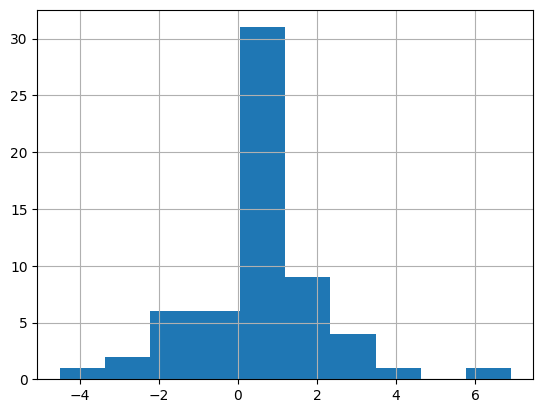

In [ ]:
deltas = (df['Yield'] - df['Yield LS'])
variable_size = deltas[deltas != 0]

## only look at ones where they do variable sizing
variable_size.hist()
variable_size.mean()

The dots above the red line are where variable bet size improved the yield, and below the line are where it hurt.

it's notable that most of the dots below the red line are at pretty low yields. That indicates to me there is a skill component, in that it's mostly touts with lower yields that are hurting their performance with variable bet sizing.

1.0701708770829987


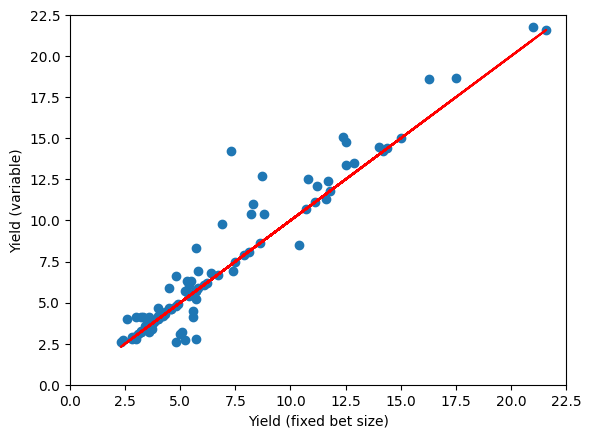

In [ ]:
x = df['Yield LS']
y = df['Yield']

slope, intercept = np.polyfit(x,y, 1)
trend_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, x, color="r")
#plt.plot(x, trend_line, color="g")
plt.xlabel("Yield (fixed bet size)")
plt.ylabel("Yield (variable)")
ax = plt.gca()
ax.set_xlim([0, 22.5])
_trash = ax.set_ylim([0,22.5])

print(slope)


### What would rational bet sizing look like?

I coded up a little simulation of bet sizing. I am generating virtual betting records of 500 bets. We will assume the bettor can distinguish between three grades of bets, and already knows their win rates from experienc.

* A bets win 60% of the time and are 20% of total bets
* B bets win 57% of the time and are 30% of total bets
* F bets win 54% of the time and are 50% of total bets.

These are just wild guesses on my part.

In [11]:
from bet_grading import BetGrading

bg = BetGrading()
_output = bg.graded_vs_ungraded()

wins: 846, losses: 154, ties: 0
mean diff: 19.70364


So, if variable bet sizing is used, it does better than flat betting 85% of the time. But that does mean it's possible to do the grading/scaling correctly and still end up with worse results. That's just the nature of randomness.

The relative weighting for A, B, and F in terms of number of units doesn't really matter as long as they're in the right order (A > B > F). It does, however, have a huge impact on the change in profitability. 

Using a 1-2-3 scale, the weighted betting earns on average 19.6 more units. At a 1-3-5 scale (which roughly matches the percent rate of return for each class of bet), it's 39.2 more units.

In [ ]:
fifty_four = .54 - (1.1 * .46) # rate of return for 54% win rate

print(1) 
print((.57 - (1.1 * .43)) / fifty_four) 
print((.6 - (1.1 * .4)) / fifty_four) 

1
2.8529411764705928
4.7058823529411855


In [ ]:
bg.units_map = {
    'A': 5,
    'B': 3,
    'F': 1
}


diffs = bg.graded_vs_ungraded()

wins: 833, losses: 167, ties: 0
mean diff: 37.57506


Humans are imperfect, though. I'm skeptical that a bettor can be perfectly rational about the bet sizing, not allowing recent record, or emotions, to affect the reading.

I wasn't totally sure how to model this. So I tried setting a certain number of grades to random values.

Here I'm doing 1000 tests of scoring 500 bets. I'm replacing some of the "true" grades with random ones, while preserving the proportion of A, B and F in the classifications I change. So not all 100 bets will have their classification changed. If "F" is 50% of the population, then 50% of those bets where we make the grade random  will end up with an "F" grade again.

'good' is without the grades scrambled, 'bad' is with the scrambling, and 'flat' is the result with flat betting. 'fraction_agree' is what fraction of the grades stayed the same between the 'good' and 'bad' versions.

In [ ]:
scores = bg.test_some_grades(1000, 500, 300)

scores.head()

,good,bad,flat,fraction_agree
0,114.5,54.9,45.84,0.734
1,57.4,92.4,111.36,0.744
2,107.4,84.2,81.12,0.668
3,129.8,57.0,50.88,0.722
4,87.9,54.1,76.08,0.724


The flat grading only beats the good grading 13% of the time and the scrambled grading 25% of the time.

In [ ]:
sum(scores.flat > scores.good)

132

In [ ]:
sum(scores.flat > scores.bad)

252

Based on this extremely primitive simulation, it appears there is value in weighting bets based on confidence. The grading can be pretty bad and it still produces better results than betting the same flat amount on every game. So there isn't a huge downside to it, though there's always the possibility that it will make things worse. Over a larger and larger sample of games, that's going to be less likely to happen.

That doesn't mean it's possible for everybody to do, though. For one thing, I'm assuming the bettor knows exactly what percent of the time each grade of bet wins. That would take a lot of data -- at least 100 bets at each grade of bet used -- to get a really tight estimate of the correct amount to be risking on each grade.